# Libraries:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

# Load Data:

In [4]:
df=pd.read_csv("car_price_prediction.csv")


In [5]:
print(f'Dataset includes {df.shape[0]} rows and {df.shape[1]} columns')


Dataset includes 19237 rows and 18 columns


In [6]:
df.columns=df.columns.str.lower().str.replace(' ','_')
print(f'Features :\n{df.drop("price", axis=1).columns.to_list()}')
print('-'*50)
print(f'Target :\n{["price"]}')

Features :
['id', 'levy', 'manufacturer', 'model', 'prod._year', 'category', 'leather_interior', 'fuel_type', 'engine_volume', 'mileage', 'cylinders', 'gear_box_type', 'drive_wheels', 'doors', 'wheel', 'color', 'airbags']
--------------------------------------------------
Target :
['price']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                19237 non-null  int64  
 1   price             19237 non-null  int64  
 2   levy              19237 non-null  object 
 3   manufacturer      19237 non-null  object 
 4   model             19237 non-null  object 
 5   prod._year        19237 non-null  int64  
 6   category          19237 non-null  object 
 7   leather_interior  19237 non-null  object 
 8   fuel_type         19237 non-null  object 
 9   engine_volume     19237 non-null  object 
 10  mileage           19237 non-null  object 
 11  cylinders         19237 non-null  float64
 12  gear_box_type     19237 non-null  object 
 13  drive_wheels      19237 non-null  object 
 14  doors             19237 non-null  object 
 15  wheel             19237 non-null  object 
 16  color             19237 non-null  object

In [8]:
object_cols = list(df.select_dtypes(include='object').columns)
numeric_cols = list(df.select_dtypes(include=['int64', 'float64']).columns)
print(f'NO.of Object columns : {len(object_cols)}')
print(f'Object columns : {object_cols}')
print('-'*50)
print(f'NO.of Numeric columns : {len(numeric_cols)}')
print(f'Numeric columns : {numeric_cols}')


NO.of Object columns : 13
Object columns : ['levy', 'manufacturer', 'model', 'category', 'leather_interior', 'fuel_type', 'engine_volume', 'mileage', 'gear_box_type', 'drive_wheels', 'doors', 'wheel', 'color']
--------------------------------------------------
NO.of Numeric columns : 5
Numeric columns : ['id', 'price', 'prod._year', 'cylinders', 'airbags']


In [9]:
df.head()

,id,price,levy,manufacturer,model,prod._year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [10]:
df.tail()

,id,price,levy,manufacturer,model,prod._year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12


# Data Cleaning:

In [11]:
# check duplicate:
print(f'Duplicate rows : {df.duplicated().sum()}')


Duplicate rows : 313


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
print(f'Duplicate rows : {df.duplicated().sum()}')

Duplicate rows : 0


In [14]:
# check null values :
print(f'Null Values :\n{df.isnull().sum()}','-'*50,f'Total: {df.isnull().sum().sum()} ',sep='\n')


Null Values :
id                  0
price               0
levy                0
manufacturer        0
model               0
prod._year          0
category            0
leather_interior    0
fuel_type           0
engine_volume       0
mileage             0
cylinders           0
gear_box_type       0
drive_wheels        0
doors               0
wheel               0
color               0
airbags             0
dtype: int64
--------------------------------------------------
Total: 0 


In [15]:
df.dropna( inplace=True)

In [16]:

print(f'Null Values :\n{df.isnull().sum()}','-'*50,f'Total: {df.isnull().sum().sum()} ',sep='\n')

Null Values :
id                  0
price               0
levy                0
manufacturer        0
model               0
prod._year          0
category            0
leather_interior    0
fuel_type           0
engine_volume       0
mileage             0
cylinders           0
gear_box_type       0
drive_wheels        0
doors               0
wheel               0
color               0
airbags             0
dtype: int64
--------------------------------------------------
Total: 0 


In [17]:
# text treatment:
for col in object_cols:
  df[col]=df[col].str.lower()
  if col=='levy':
    df[col]=df[col].str.replace('-','0')
    df[col]=df[col].str.replace('.','')
  if col=='engine_volume':
    df[col]=df[col].str.strip('turbo')
  if col=='mileage':
    df[col]=df[col].str.strip('_km')
  if col=='doors':
    df[col]=df[col].str.replace('-may','')
    df[col]=df[col].str.replace('-mar','')
    df[col]=df[col].str.replace('0','')
    df[col]=df[col].str.replace('>','')



In [18]:
# print some of unique value for each object col:
for col in object_cols:
  print(f'{col} : {df[col].unique()[:10]}')
  print('-'*50)

levy : ['1399' '1018' '0' '862' '446' '891' '761' '751' '394' '1053']
--------------------------------------------------
manufacturer : ['lexus' 'chevrolet' 'honda' 'ford' 'hyundai' 'toyota' 'mercedes-benz'
 'opel' 'porsche' 'bmw']
--------------------------------------------------
model : ['rx 450' 'equinox' 'fit' 'escape' 'santa fe' 'prius' 'sonata' 'camry'
 'rx 350' 'e 350']
--------------------------------------------------
category : ['jeep' 'hatchback' 'sedan' 'microbus' 'goods wagon' 'universal' 'coupe'
 'minivan' 'cabriolet' 'limousine']
--------------------------------------------------
leather_interior : ['yes' 'no']
--------------------------------------------------
fuel_type : ['hybrid' 'petrol' 'diesel' 'cng' 'plug-in hybrid' 'lpg' 'hydrogen']
--------------------------------------------------
engine_volume : ['3.5' '3' '1.3' '2.5' '2' '1.8' '2.4' '4' '1.6' '3.3']
--------------------------------------------------
mileage : ['186005 ' '192000 ' '200000 ' '168966 ' '91901 '

In [19]:
df.head()

,id,price,levy,manufacturer,model,prod._year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
0,45654403,13328,1399,lexus,rx 450,2010,jeep,yes,hybrid,3.5,186005,6.0,automatic,4x4,4,left wheel,silver,12
1,44731507,16621,1018,chevrolet,equinox,2011,jeep,no,petrol,3,192000,6.0,tiptronic,4x4,4,left wheel,black,8
2,45774419,8467,0,honda,fit,2006,hatchback,no,petrol,1.3,200000,4.0,variator,front,4,right-hand drive,black,2
3,45769185,3607,862,ford,escape,2011,jeep,yes,hybrid,2.5,168966,4.0,automatic,4x4,4,left wheel,white,0
4,45809263,11726,446,honda,fit,2014,hatchback,yes,petrol,1.3,91901,4.0,automatic,front,4,left wheel,silver,4


In [20]:
for col in object_cols:
  if df[col].str.isnumeric().all():
    df[col]=df[col].astype('int')


In [21]:
object_cols = list(df.select_dtypes(include='object').columns)
numeric_cols = list(df.select_dtypes(include=['int64', 'float64']).columns)
print(f'NO.of Object columns : {len(object_cols)}')
print(f'Object columns : {object_cols}')
print('-'*50)
print(f'NO.of Numeric columns : {len(numeric_cols)}')
print(f'Numeric columns : {numeric_cols}')

NO.of Object columns : 11
Object columns : ['manufacturer', 'model', 'category', 'leather_interior', 'fuel_type', 'engine_volume', 'mileage', 'gear_box_type', 'drive_wheels', 'wheel', 'color']
--------------------------------------------------
NO.of Numeric columns : 7
Numeric columns : ['id', 'price', 'levy', 'prod._year', 'cylinders', 'doors', 'airbags']


In [22]:
df.head()

,id,price,levy,manufacturer,model,prod._year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
0,45654403,13328,1399,lexus,rx 450,2010,jeep,yes,hybrid,3.5,186005,6.0,automatic,4x4,4,left wheel,silver,12
1,44731507,16621,1018,chevrolet,equinox,2011,jeep,no,petrol,3,192000,6.0,tiptronic,4x4,4,left wheel,black,8
2,45774419,8467,0,honda,fit,2006,hatchback,no,petrol,1.3,200000,4.0,variator,front,4,right-hand drive,black,2
3,45769185,3607,862,ford,escape,2011,jeep,yes,hybrid,2.5,168966,4.0,automatic,4x4,4,left wheel,white,0
4,45809263,11726,446,honda,fit,2014,hatchback,yes,petrol,1.3,91901,4.0,automatic,front,4,left wheel,silver,4


In [23]:
# 1- treat levy col:
df.levy.value_counts()

levy
0       5709
765      482
891      453
639      403
640      398
        ... 
2308       1
4860       1
1641       1
1045       1
1901       1
Name: count, Length: 559, dtype: int64

In [24]:
df.levy.describe()

count    18924.000000
mean       632.886493
std        568.273736
min          0.000000
25%          0.000000
50%        642.000000
75%        917.000000
max      11714.000000
Name: levy, dtype: float64

In [25]:
med = df['levy'].replace(0, np.nan).median()  # Compute the median ignoring zeros
df['levy'] = df['levy'].replace(0, med)       # Replace zeros with the median
print('Done')


Done


In [26]:
# 2- treat fuel_type col:
df.fuel_type.value_counts()

fuel_type
petrol            9944
diesel            4001
hybrid            3539
lpg                885
cng                469
plug-in hybrid      85
hydrogen             1
Name: count, dtype: int64

In [27]:

df = df[df['fuel_type'].isin(['petrol', 'diesel', 'hybrid'])]
print('Done')

Done


In [28]:
# 3- treat mileage col:
df.mileage=df.mileage.astype('int')

In [29]:
# 4- treat manufacturer col:
df.manufacturer.value_counts().nlargest(6)

manufacturer
toyota           3533
hyundai          3105
mercedes-benz    1859
ford             1052
chevrolet         985
bmw               976
Name: count, dtype: int64

In [30]:
df=df[df.manufacturer.isin(['toyota','hyundai','mercedes-benz','ford','chevrolet','bmw'])]
df.rename(columns={'manufacturer':'brand'},inplace=True)

In [31]:
# 5- treat model col:
df.drop('model',axis=1,inplace=True)

In [32]:
# 6- treat category col:
df.category.value_counts().nlargest(6)

category
sedan        5697
jeep         2921
hatchback    1494
minivan       411
coupe         358
microbus      285
Name: count, dtype: int64

In [33]:
df=df[df.category.isin(['sedan','jeep','hatchback','minivan','coupe','microbus'])]

In [34]:
# 7- treat engine_volume col:
df.engine_volume=df.engine_volume.astype('float64')

In [35]:
# 8- treat gear_box_type col:
df.gear_box_type.value_counts()

gear_box_type
automatic    8169
tiptronic    1887
manual        681
variator      429
Name: count, dtype: int64

In [36]:
df.gear_box_type.replace('tiptronic','automatic',inplace=True)
df=df[df.gear_box_type.isin(['automatic','manual'])]
df.rename(columns={'gear_box_type':'type'},inplace=True)


C:\Users\3bdelmoemn\AppData\Local\Temp\ipykernel_4060\944795222.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.gear_box_type.replace('tiptronic','automatic',inplace=True)


In [37]:
# 9 wheel:
df.wheel.value_counts()

wheel
left wheel          10396
right-hand drive      341
Name: count, dtype: int64

In [38]:
df.wheel.replace('left wheel','left',inplace=True)
df.wheel.replace('right-hand drive','right',inplace=True)

C:\Users\3bdelmoemn\AppData\Local\Temp\ipykernel_4060\1885464313.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.wheel.replace('left wheel','left',inplace=True)
C:\Users\3bdelmoemn\AppData\Local\Temp\ipykernel_4060\1885464313.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [39]:
# 10- color column:
df.color.value_counts().nlargest(7)

color
black     2969
white     2668
silver    1881
grey      1508
blue       758
red        321
green      131
Name: count, dtype: int64

In [40]:
df=df[df.color.isin(['black','white','red','blue','silver','grey','green'])]

In [41]:
# 11- treat prod_year:
df['car_age']=2024-df['prod._year']


In [42]:
# 12- drop id ,prod_year:
df.drop(['id','prod._year'],axis=1,inplace=True)

In [43]:
df.doors.value_counts()

doors
4    9810
2     360
5      66
Name: count, dtype: int64

In [44]:
df=df[df.doors.isin([2,4])]
df.doors=df.doors.astype('object')

In [45]:
df.cylinders.value_counts()

cylinders
4.0     7511
6.0     2093
8.0      410
5.0       66
3.0       25
12.0      22
2.0       18
1.0       10
10.0       9
7.0        3
16.0       2
14.0       1
Name: count, dtype: int64

In [46]:
# update price:
df.price=df.price*100

In [47]:
object_cols = list(df.select_dtypes(include='object').columns)
numeric_cols = list(df.select_dtypes(include=['int64', 'float64']).columns)
print(f'NO.of Object columns : {len(object_cols)}')
print(f'Object columns : {object_cols}')
print('-'*50)
print(f'NO.of Numeric columns : {len(numeric_cols)}')
print(f'Numeric columns : {numeric_cols}')

NO.of Object columns : 9
Object columns : ['brand', 'category', 'leather_interior', 'fuel_type', 'type', 'drive_wheels', 'doors', 'wheel', 'color']
--------------------------------------------------
NO.of Numeric columns : 7
Numeric columns : ['price', 'levy', 'engine_volume', 'mileage', 'cylinders', 'airbags', 'car_age']


In [48]:
df.head()

,price,levy,brand,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,type,drive_wheels,doors,wheel,color,airbags,car_age
1,1662100,1018,chevrolet,jeep,no,petrol,3.0,192000,6.0,automatic,4x4,4,left,black,8,13
3,360700,862,ford,jeep,yes,hybrid,2.5,168966,4.0,automatic,4x4,4,left,white,0,13
5,3949300,891,hyundai,jeep,yes,diesel,2.0,160931,4.0,automatic,front,4,left,white,4,8
6,180300,761,toyota,hatchback,yes,hybrid,1.8,258909,4.0,automatic,front,4,left,white,12,14
7,54900,751,hyundai,sedan,yes,petrol,2.4,216118,4.0,automatic,front,4,left,grey,12,11


In [49]:
print(f'Dataset includes {df.shape[0]} rows and {df.shape[1]} columns')

Dataset includes 10170 rows and 16 columns


In [50]:
# save cleaned data:
# df.to_csv('car_price_Dataset_cleaned.csv',index=False)

# Exploratory Data Analysis:

In [51]:
# load cleaned Data:
df=pd.read_csv('car_price_Dataset_cleaned.csv',dtype={'doors': 'object'})

In [52]:
print(f'Dataset includes {df.shape[0]} rows and {df.shape[1]} columns')

Dataset includes 10170 rows and 16 columns


In [53]:
df.head()

,price,levy,brand,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,type,drive_wheels,doors,wheel,color,airbags,car_age
0,1662100,1018,chevrolet,jeep,no,petrol,3.0,192000,6.0,automatic,4x4,4,left,black,8,13
1,360700,862,ford,jeep,yes,hybrid,2.5,168966,4.0,automatic,4x4,4,left,white,0,13
2,3949300,891,hyundai,jeep,yes,diesel,2.0,160931,4.0,automatic,front,4,left,white,4,8
3,180300,761,toyota,hatchback,yes,hybrid,1.8,258909,4.0,automatic,front,4,left,white,12,14
4,54900,751,hyundai,sedan,yes,petrol,2.4,216118,4.0,automatic,front,4,left,grey,12,11


In [54]:
df.tail()

,price,levy,brand,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,type,drive_wheels,doors,wheel,color,airbags,car_age
10165,580200,1055,mercedes-benz,sedan,yes,diesel,3.5,107800,6.0,automatic,rear,4,left,grey,12,11
10166,1568100,831,hyundai,sedan,yes,petrol,2.4,161600,4.0,automatic,front,4,left,red,8,13
10167,2610800,836,hyundai,jeep,yes,diesel,2.0,116365,4.0,automatic,front,4,left,grey,4,14
10168,533100,1288,chevrolet,jeep,yes,diesel,2.0,51258,4.0,automatic,front,4,left,black,4,17
10169,47000,753,hyundai,sedan,yes,hybrid,2.4,186923,4.0,automatic,front,4,left,white,12,12


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10170 entries, 0 to 10169
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             10170 non-null  int64  
 1   levy              10170 non-null  int64  
 2   brand             10170 non-null  object 
 3   category          10170 non-null  object 
 4   leather_interior  10170 non-null  object 
 5   fuel_type         10170 non-null  object 
 6   engine_volume     10170 non-null  float64
 7   mileage           10170 non-null  int64  
 8   cylinders         10170 non-null  float64
 9   type              10170 non-null  object 
 10  drive_wheels      10170 non-null  object 
 11  doors             10170 non-null  object 
 12  wheel             10170 non-null  object 
 13  color             10170 non-null  object 
 14  airbags           10170 non-null  int64  
 15  car_age           10170 non-null  int64  
dtypes: float64(2), int64(5), object(9)
memor

In [56]:
object_cols=list(df.select_dtypes(include=['object']))
numeric_cols=list(df.select_dtypes(include=['int64','float64']))
print(f'NO.of Object columns : {len(object_cols)}')
print(f'Object columns : {object_cols}')
print('-'*50)
print(f'NO.of Numeric columns : {len(numeric_cols)}')
print(f'Numeric columns : {numeric_cols}')

NO.of Object columns : 9
Object columns : ['brand', 'category', 'leather_interior', 'fuel_type', 'type', 'drive_wheels', 'doors', 'wheel', 'color']
--------------------------------------------------
NO.of Numeric columns : 7
Numeric columns : ['price', 'levy', 'engine_volume', 'mileage', 'cylinders', 'airbags', 'car_age']


In [57]:
print('-'*50,'Statistical values of Numerical Data:','-'*50,sep='\n')
df[numeric_cols].describe()

--------------------------------------------------
Statistical values of Numerical Data:
--------------------------------------------------


,price,levy,engine_volume,mileage,cylinders,airbags,car_age
count,1.017000e+04,10170.000000,10170.000000,1.017000e+04,10170.000000,10170.000000,10170.000000
mean,1.828074e+06,860.819567,2.353569,1.108460e+06,4.597247,7.302655,12.150442
std,2.003401e+06,390.537872,0.815654,4.125554e+07,1.160886,4.361306,4.687289
min,1.000000e+02,87.000000,0.000000,0.000000e+00,1.000000,0.000000,4.000000
25%,4.391000e+05,687.000000,1.800000,7.075750e+04,4.000000,4.000000,9.000000
50%,1.474000e+06,781.000000,2.000000,1.230000e+05,4.000000,8.000000,11.000000
75%,2.440775e+06,971.000000,2.500000,1.808000e+05,5.000000,12.000000,14.000000
max,6.272200e+07,11714.000000,6.300000,2.147484e+09,16.000000,16.000000,81.000000


In [58]:
print('-'*50,'Details of Categorical Data:','-'*50,sep='\n')
df[object_cols].describe()

--------------------------------------------------
Details of Categorical Data:
--------------------------------------------------


,brand,category,leather_interior,fuel_type,type,drive_wheels,doors,wheel,color
count,10170,10170,10170,10170,10170,10170,10170,10170,10170
unique,6,6,2,3,2,3,2,2,7
top,toyota,sedan,yes,petrol,automatic,front,4,left,black
freq,2909,5290,8111,5181,9567,6754,9810,9864,2949


In [59]:
print('-'*50,'Skewness of Numerical Data: ','-'*50,sep='\n')
df[numeric_cols].skew()

--------------------------------------------------
Skewness of Numerical Data: 
--------------------------------------------------


price             5.512271
levy              8.284138
engine_volume     1.471197
mileage          46.782264
cylinders         2.114594
airbags          -0.160173
car_age           1.891265
dtype: float64

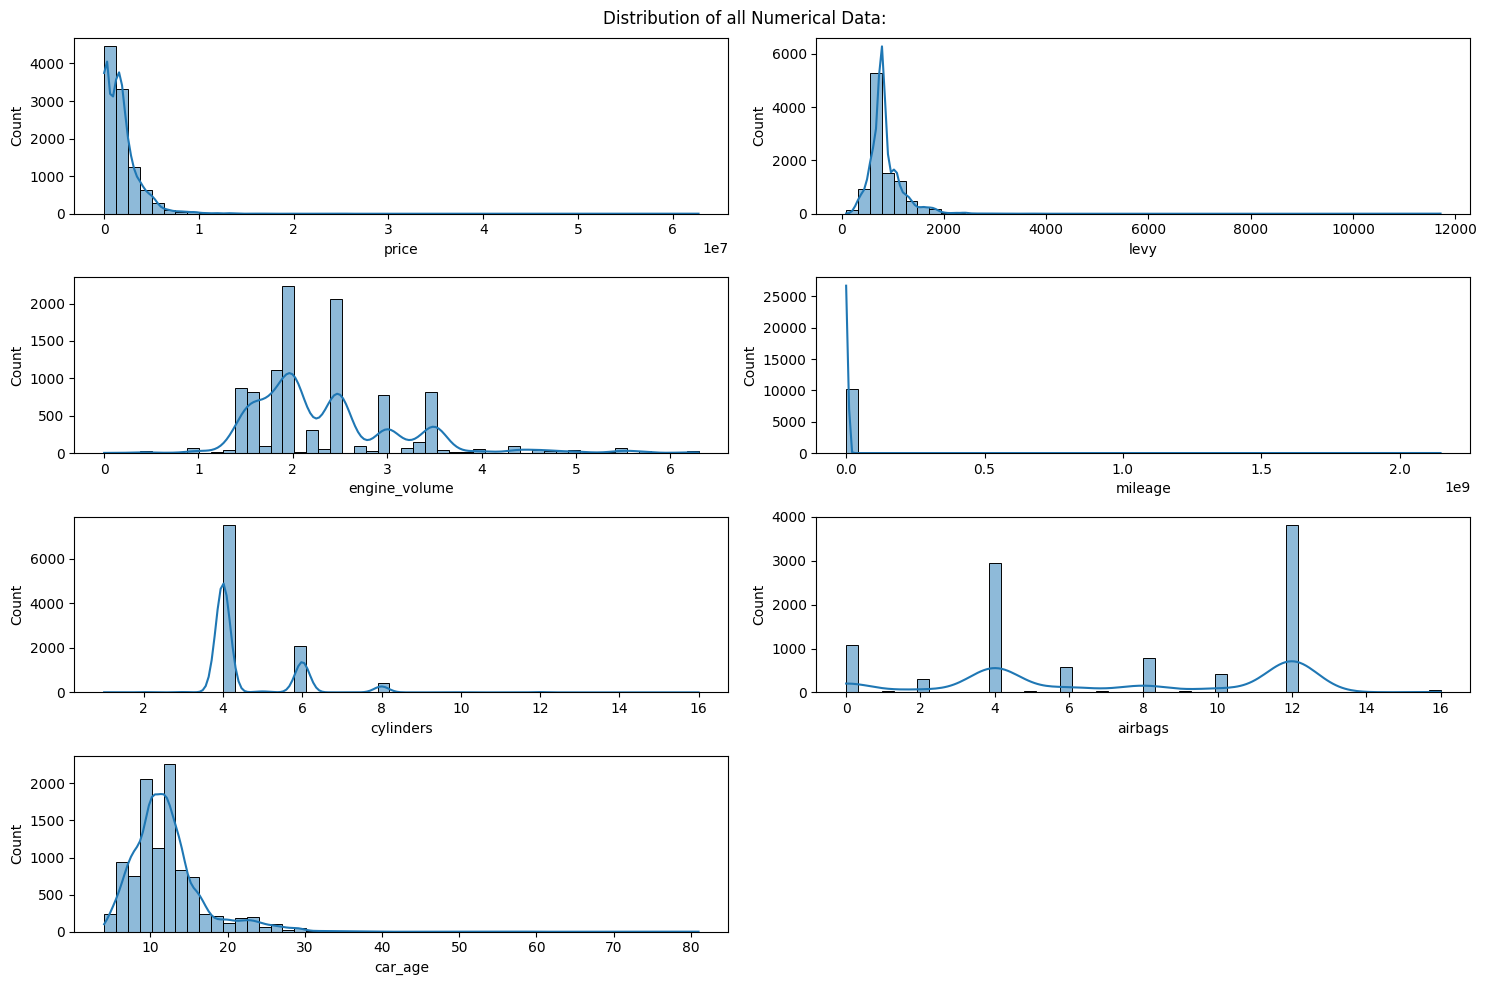

In [60]:
# plot Distribution of all Numerical Data:
plt.figure(figsize=(15,10))
for i,col in enumerate(numeric_cols):
    plt.subplot(4,2,i+1)
    sns.histplot(df[col], bins=50, kde=True)
plt.suptitle('Distribution of all Numerical Data:')
plt.tight_layout()
plt.show()

In [61]:
# print value counts for each object attributes:
for col in object_cols:
  print(f'{df[col].value_counts()}')
  print('-'*50)

brand
toyota           2909
hyundai          2847
mercedes-benz    1743
chevrolet         915
bmw               907
ford              849
Name: count, dtype: int64
--------------------------------------------------
category
sedan        5290
jeep         2792
hatchback    1130
minivan       367
coupe         348
microbus      243
Name: count, dtype: int64
--------------------------------------------------
leather_interior
yes    8111
no     2059
Name: count, dtype: int64
--------------------------------------------------
fuel_type
petrol    5181
diesel    2760
hybrid    2229
Name: count, dtype: int64
--------------------------------------------------
type
automatic    9567
manual        603
Name: count, dtype: int64
--------------------------------------------------
drive_wheels
front    6754
4x4      1777
rear     1639
Name: count, dtype: int64
--------------------------------------------------
doors
4    9810
2     360
Name: count, dtype: int64
---------------------------------------

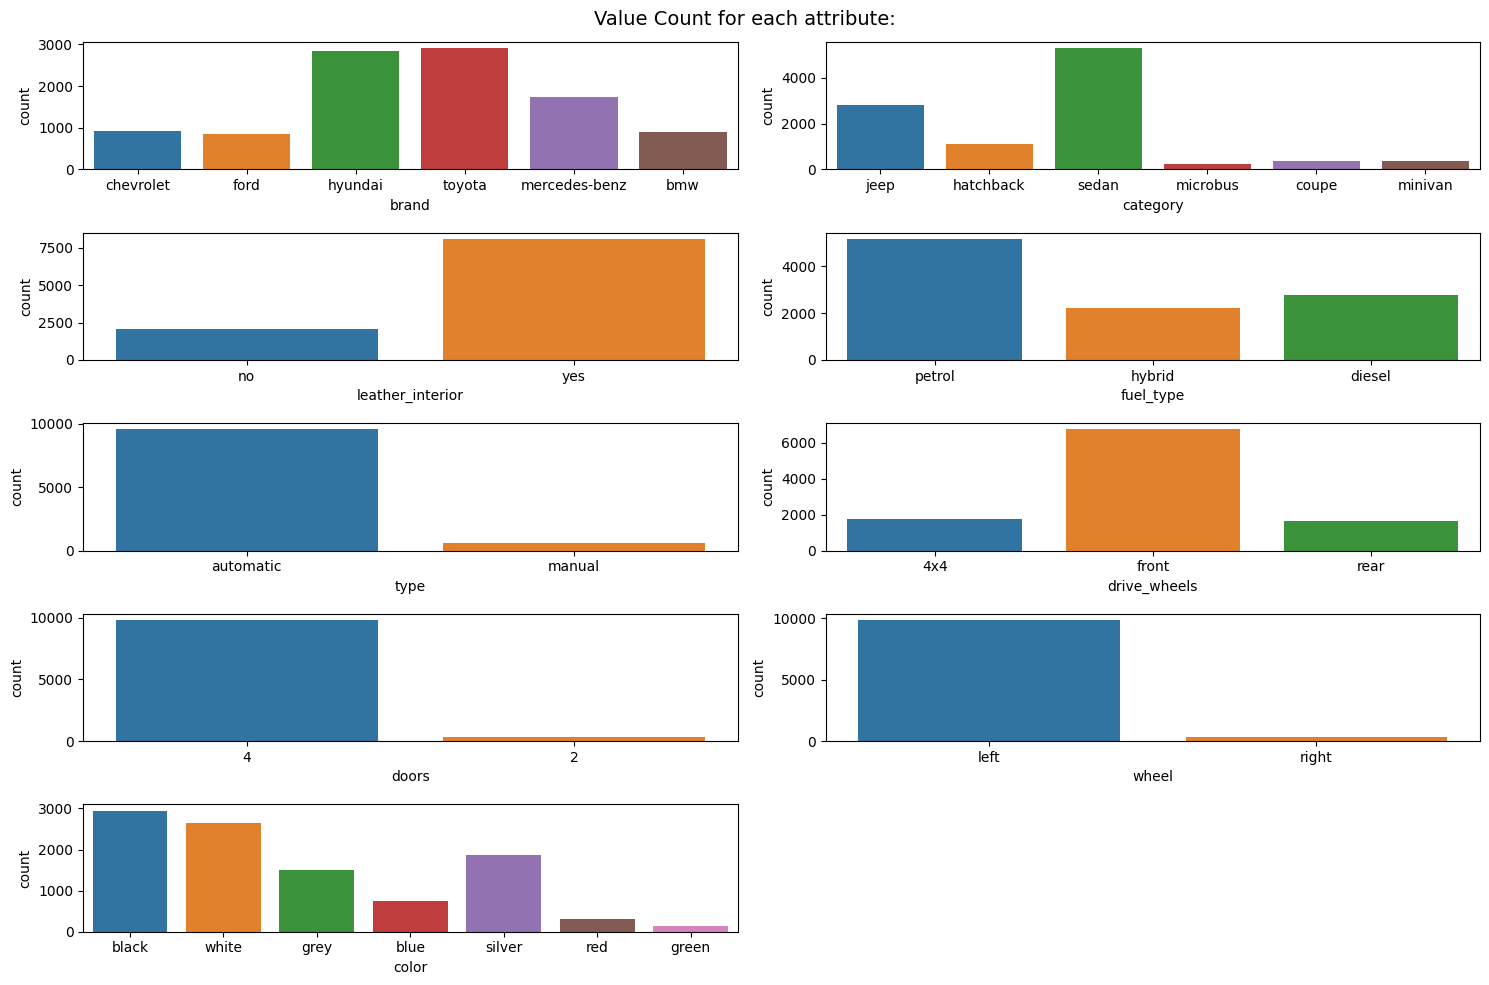

In [62]:
# plot value count for each attribute:
plt.figure(figsize=(15,10))
for i,col in enumerate(object_cols):
  plt.subplot(5,2,i+1)
  sns.countplot(data=df[object_cols],x=col,hue=col)
plt.suptitle('Value Count for each attribute:',fontsize=14)
plt.tight_layout()
plt.show()


In [63]:
# print correlation between all numerical attributes:
corr=df[numeric_cols].corr()
print(f'correlation:\n---------------\nprice vs. numerical attributes:\n---------------\n{corr.price.sort_values(ascending=False)}')

correlation:
---------------
price vs. numerical attributes:
---------------
price            1.000000
engine_volume    0.091345
cylinders        0.077945
levy             0.045319
mileage         -0.010769
airbags         -0.099514
car_age         -0.238951
Name: price, dtype: float64


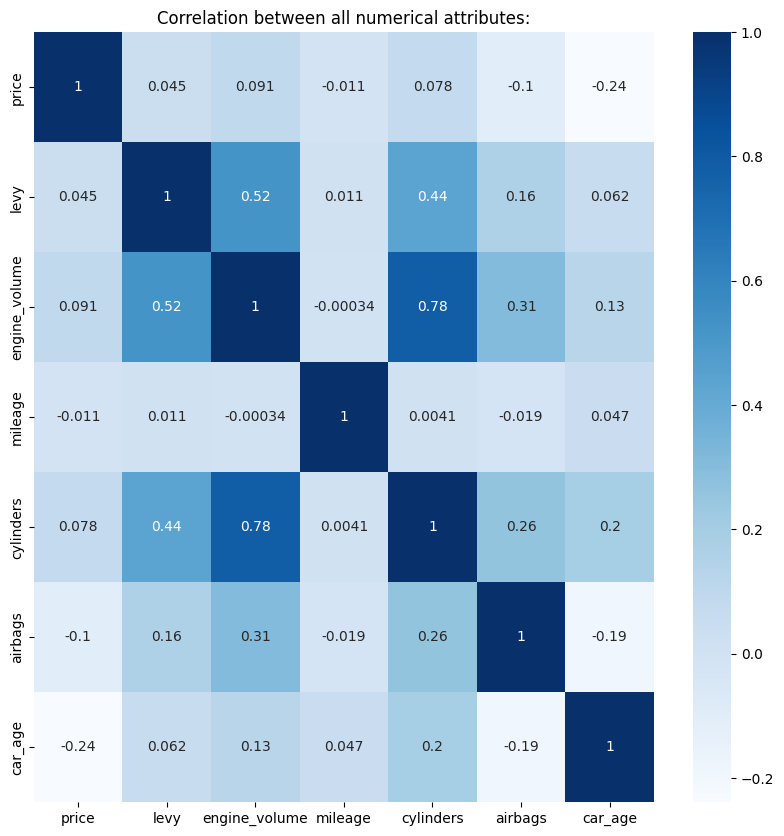

In [64]:
# plot correlation:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='Blues')
plt.title('Correlation between all numerical attributes:')
plt.show()

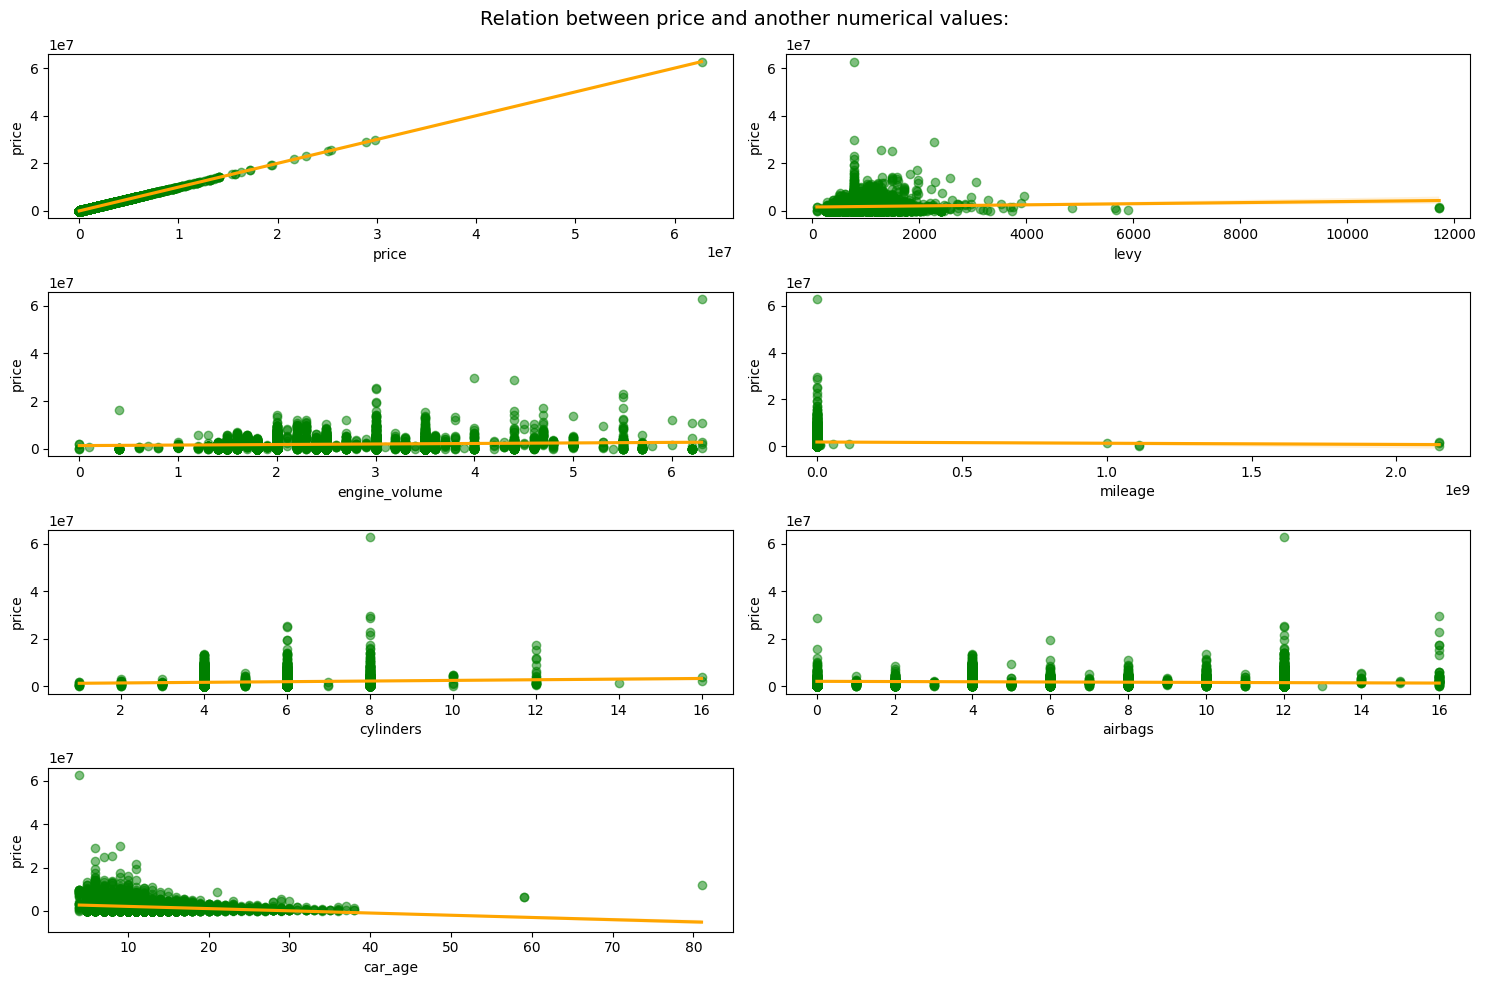

In [65]:
# plot relation between price and another numerical values:
plt.figure(figsize=(15,10))
for i,col in enumerate(numeric_cols):
  plt.subplot(4,2,i+1)
  sns.regplot(data=df[numeric_cols],x=col,y='price',line_kws={'color':'orange'},scatter_kws={'color':'green', 'alpha':0.5})
plt.suptitle('Relation between price and another numerical values:',fontsize=14)
plt.tight_layout()
plt.show()



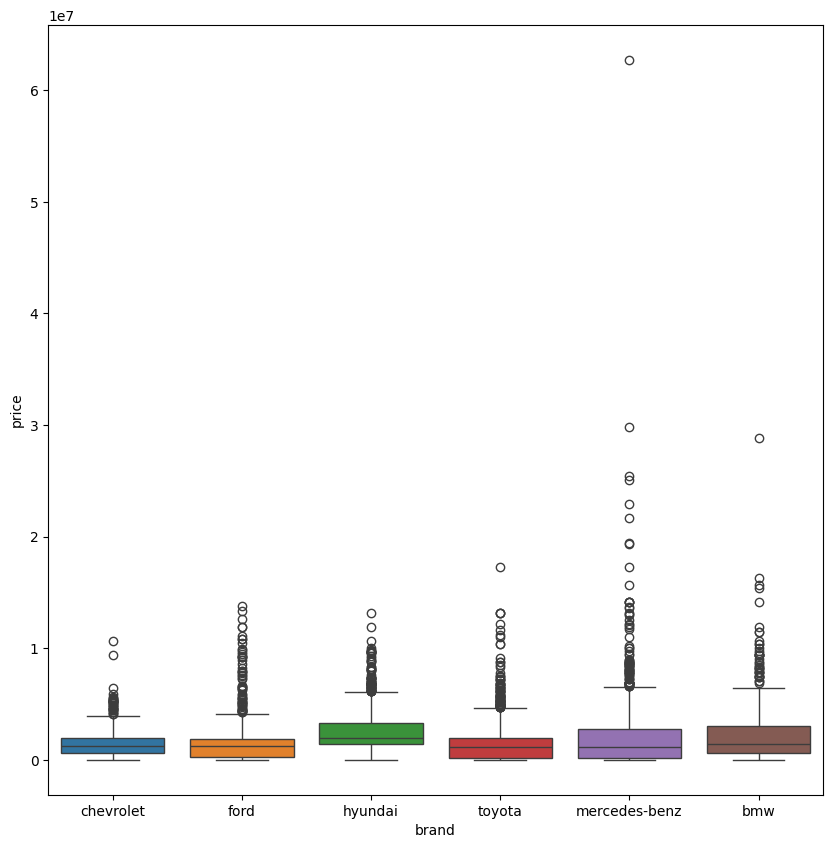

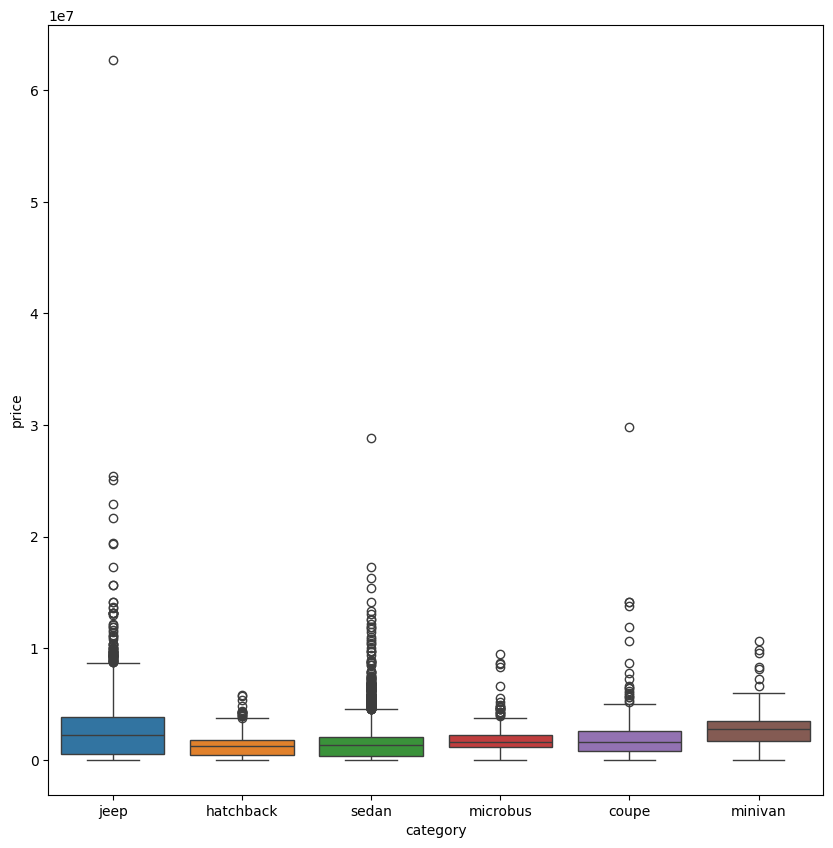

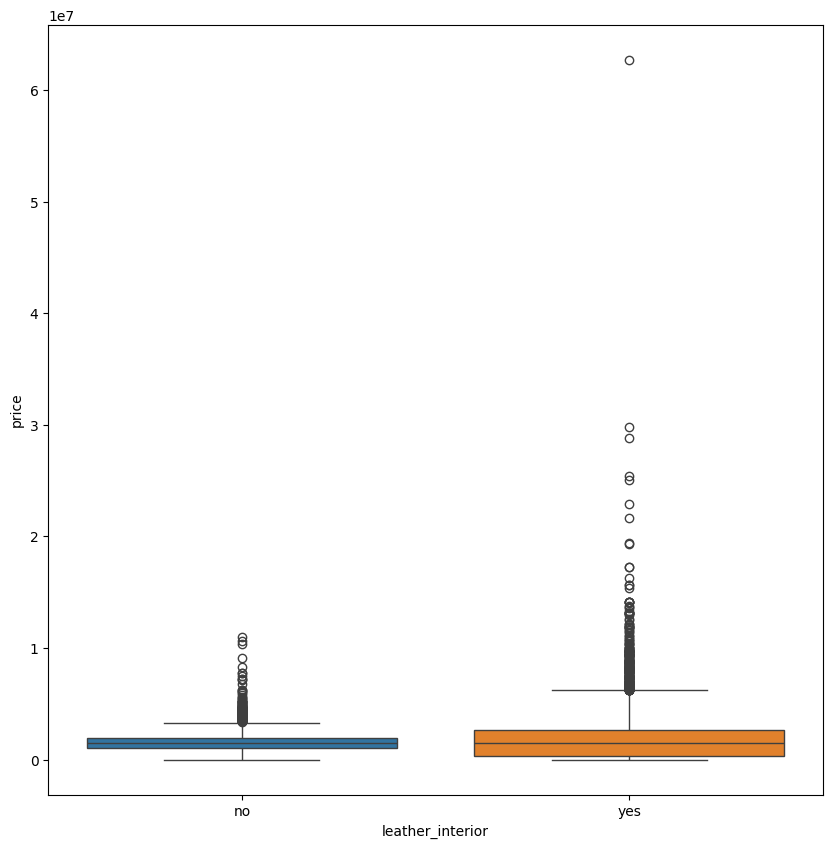

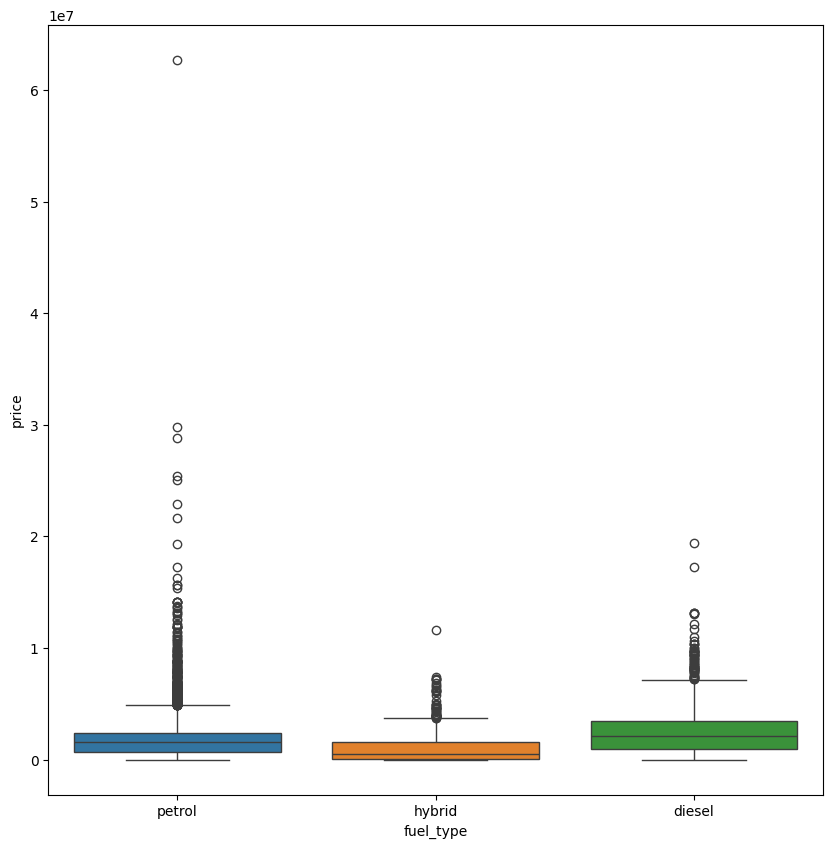

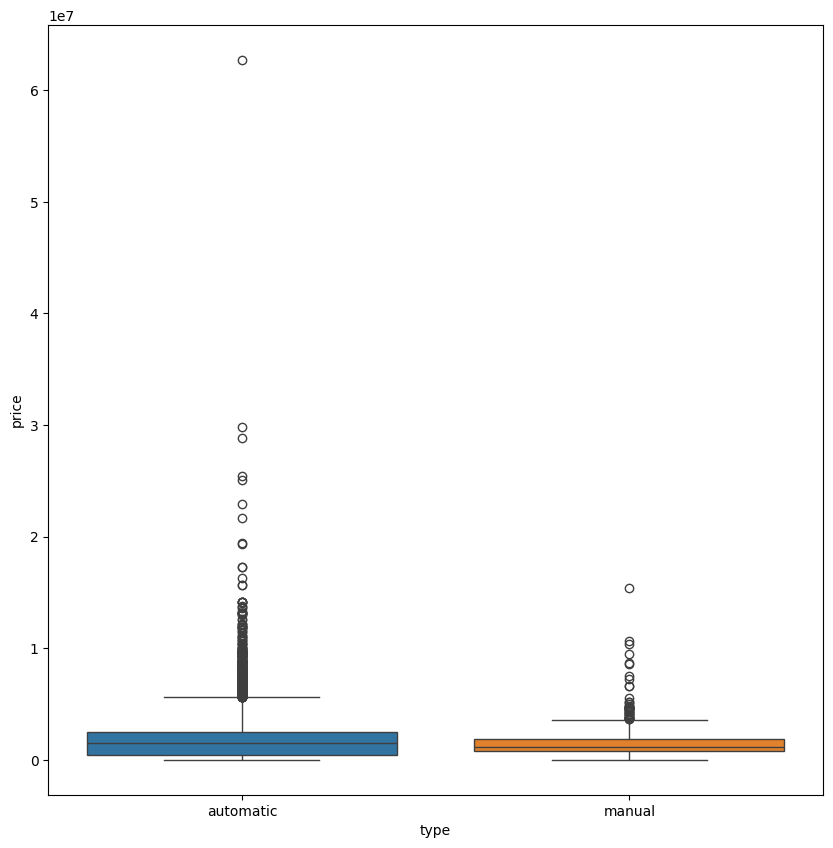

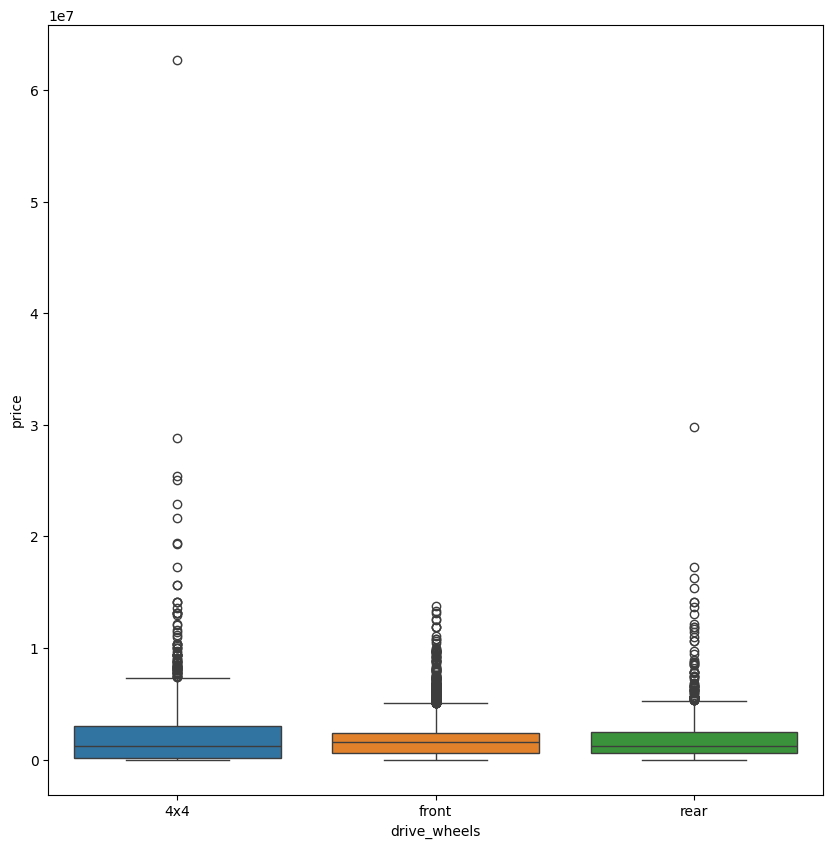

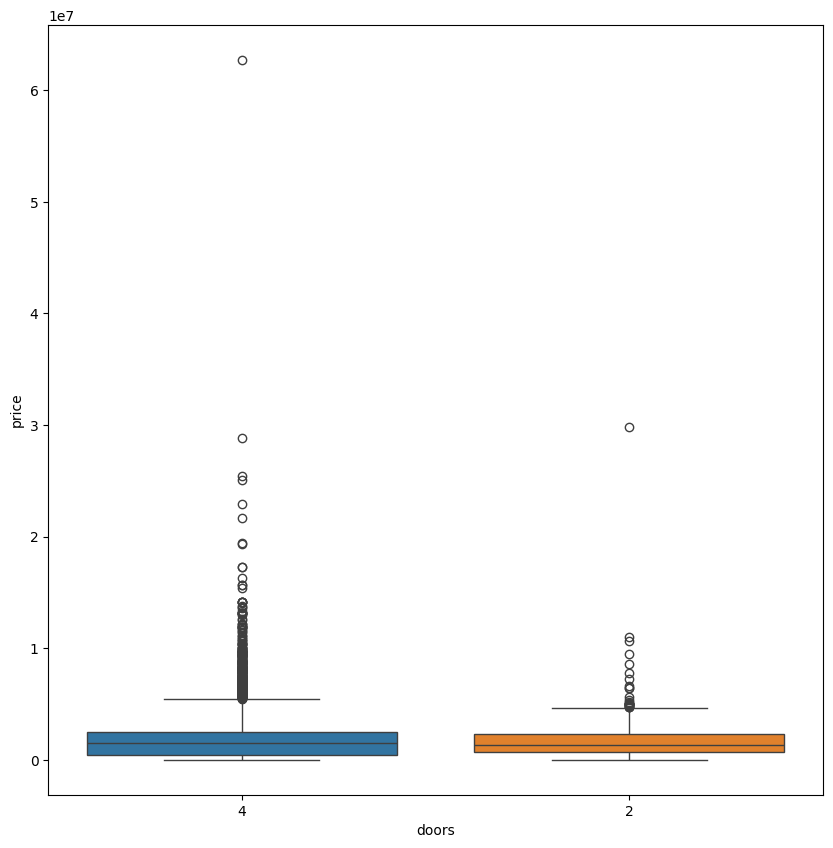

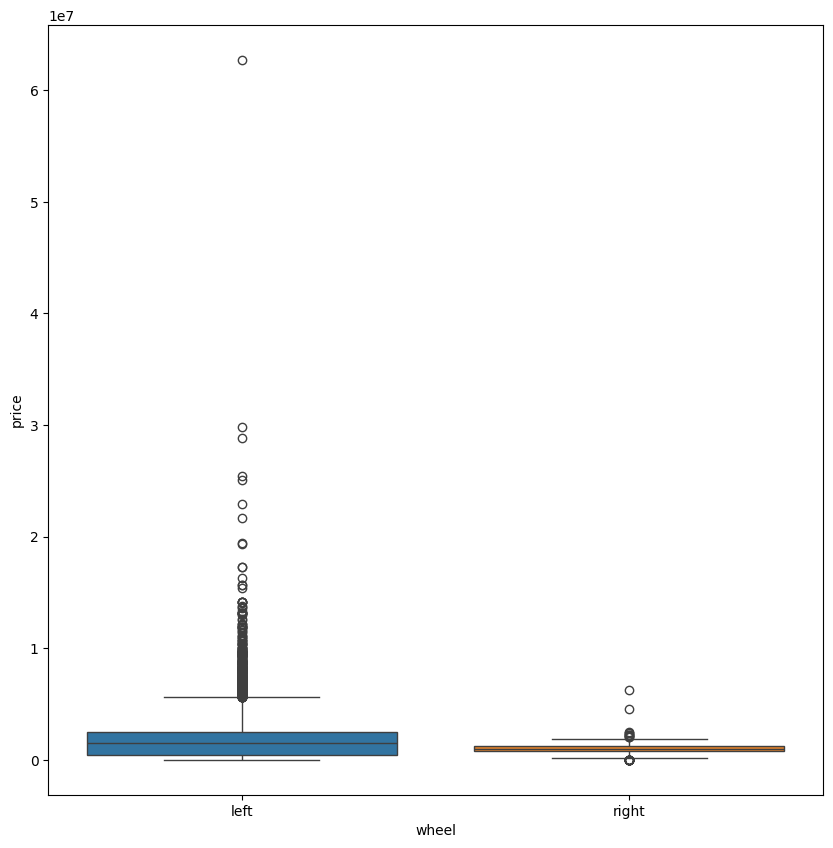

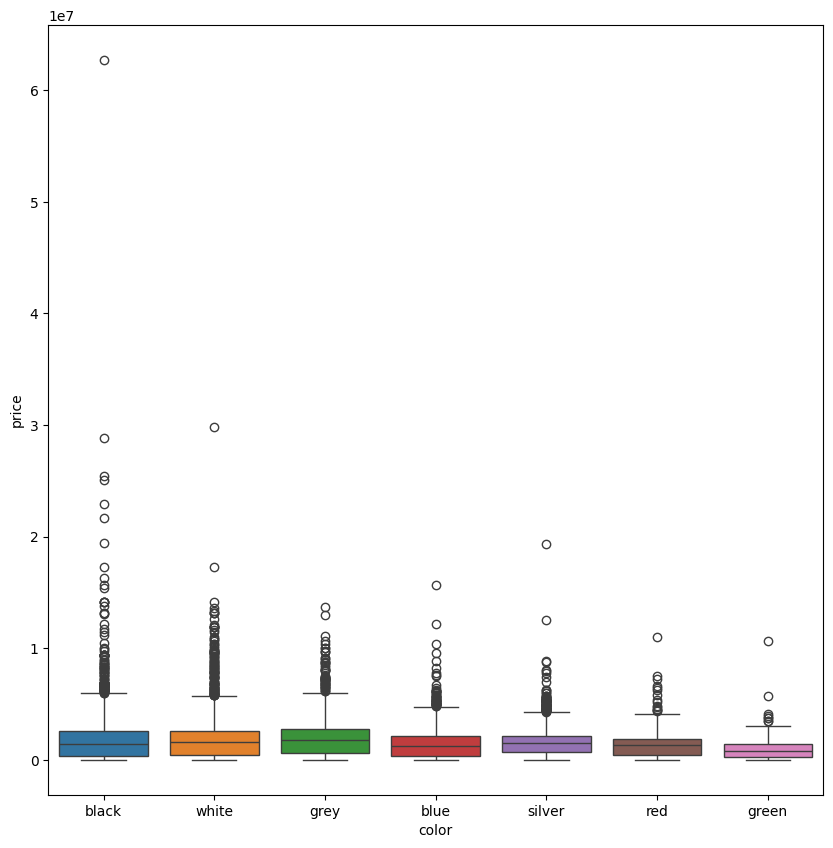

In [66]:
# plot relation between price and categorical attributes:

for col in object_cols:
  plt.figure(figsize=(10,10))
  sns.boxplot(data=df,x=col,y='price',hue=col)
  plt.show()


# Data Preprocessing:

In [67]:
df[numeric_cols].describe()

,price,levy,engine_volume,mileage,cylinders,airbags,car_age
count,1.017000e+04,10170.000000,10170.000000,1.017000e+04,10170.000000,10170.000000,10170.000000
mean,1.828074e+06,860.819567,2.353569,1.108460e+06,4.597247,7.302655,12.150442
std,2.003401e+06,390.537872,0.815654,4.125554e+07,1.160886,4.361306,4.687289
min,1.000000e+02,87.000000,0.000000,0.000000e+00,1.000000,0.000000,4.000000
25%,4.391000e+05,687.000000,1.800000,7.075750e+04,4.000000,4.000000,9.000000
50%,1.474000e+06,781.000000,2.000000,1.230000e+05,4.000000,8.000000,11.000000
75%,2.440775e+06,971.000000,2.500000,1.808000e+05,5.000000,12.000000,14.000000
max,6.272200e+07,11714.000000,6.300000,2.147484e+09,16.000000,16.000000,81.000000


In [68]:
# show skewness of numerical features:
df[numeric_cols].skew()

price             5.512271
levy              8.284138
engine_volume     1.471197
mileage          46.782264
cylinders         2.114594
airbags          -0.160173
car_age           1.891265
dtype: float64

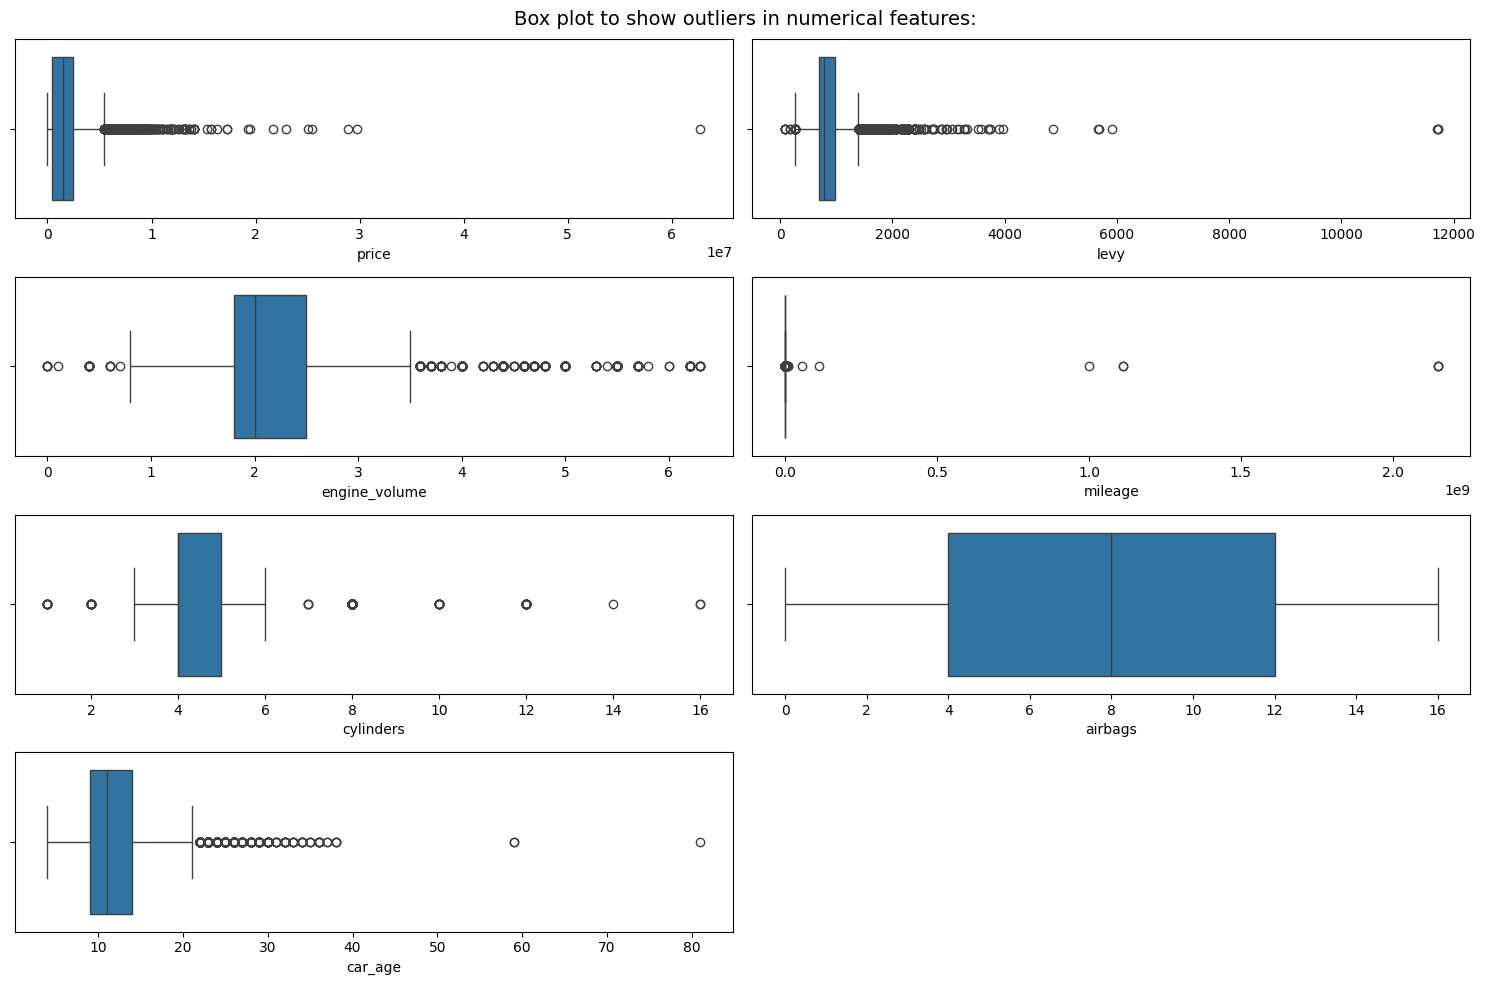

In [69]:
# Plot box plot to show outliers in numerical features:
plt.figure(figsize=(15,10))
for i,col in enumerate(numeric_cols):
  plt.subplot(4,2,i+1)
  sns.boxplot(data=df[numeric_cols],x=col)
plt.suptitle('Box plot to show outliers in numerical features:',fontsize=14)
plt.tight_layout()
plt.show()

In [70]:
# modified outlier:
q3=df[numeric_cols].quantile(0.75)
q1=df[numeric_cols].quantile(0.25)
iqr=q3-q1
upper_fence=q3+1.5*iqr
lower_fence=q1-1.5*iqr
for col in numeric_cols:
  df[col]=df[col].mask(df[col]>upper_fence[col],upper_fence[col])
  df[col]=df[col].mask(df[col]<lower_fence[col],lower_fence[col])


In [71]:
df[numeric_cols].describe()

,price,levy,engine_volume,mileage,cylinders,airbags,car_age
count,1.017000e+04,10170.000000,10170.000000,10170.000000,10170.000000,10170.000000,10170.000000
mean,1.720685e+06,832.920551,2.298461,133381.352827,4.521386,7.302655,11.922911
std,1.487411e+06,255.506624,0.658261,84923.840105,0.917220,4.361306,3.956390
min,1.000000e+02,261.000000,0.750000,0.000000,2.500000,0.000000,4.000000
25%,4.391000e+05,687.000000,1.800000,70757.500000,4.000000,4.000000,9.000000
50%,1.474000e+06,781.000000,2.000000,123000.000000,4.000000,8.000000,11.000000
75%,2.440775e+06,971.000000,2.500000,180800.000000,5.000000,12.000000,14.000000
max,5.443288e+06,1397.000000,3.550000,345863.750000,6.500000,16.000000,21.500000


In [72]:
df[numeric_cols].skew()

price            0.924101
levy             0.558986
engine_volume    0.545770
mileage          0.620034
cylinders        1.128296
airbags         -0.160173
car_age          0.744701
dtype: float64

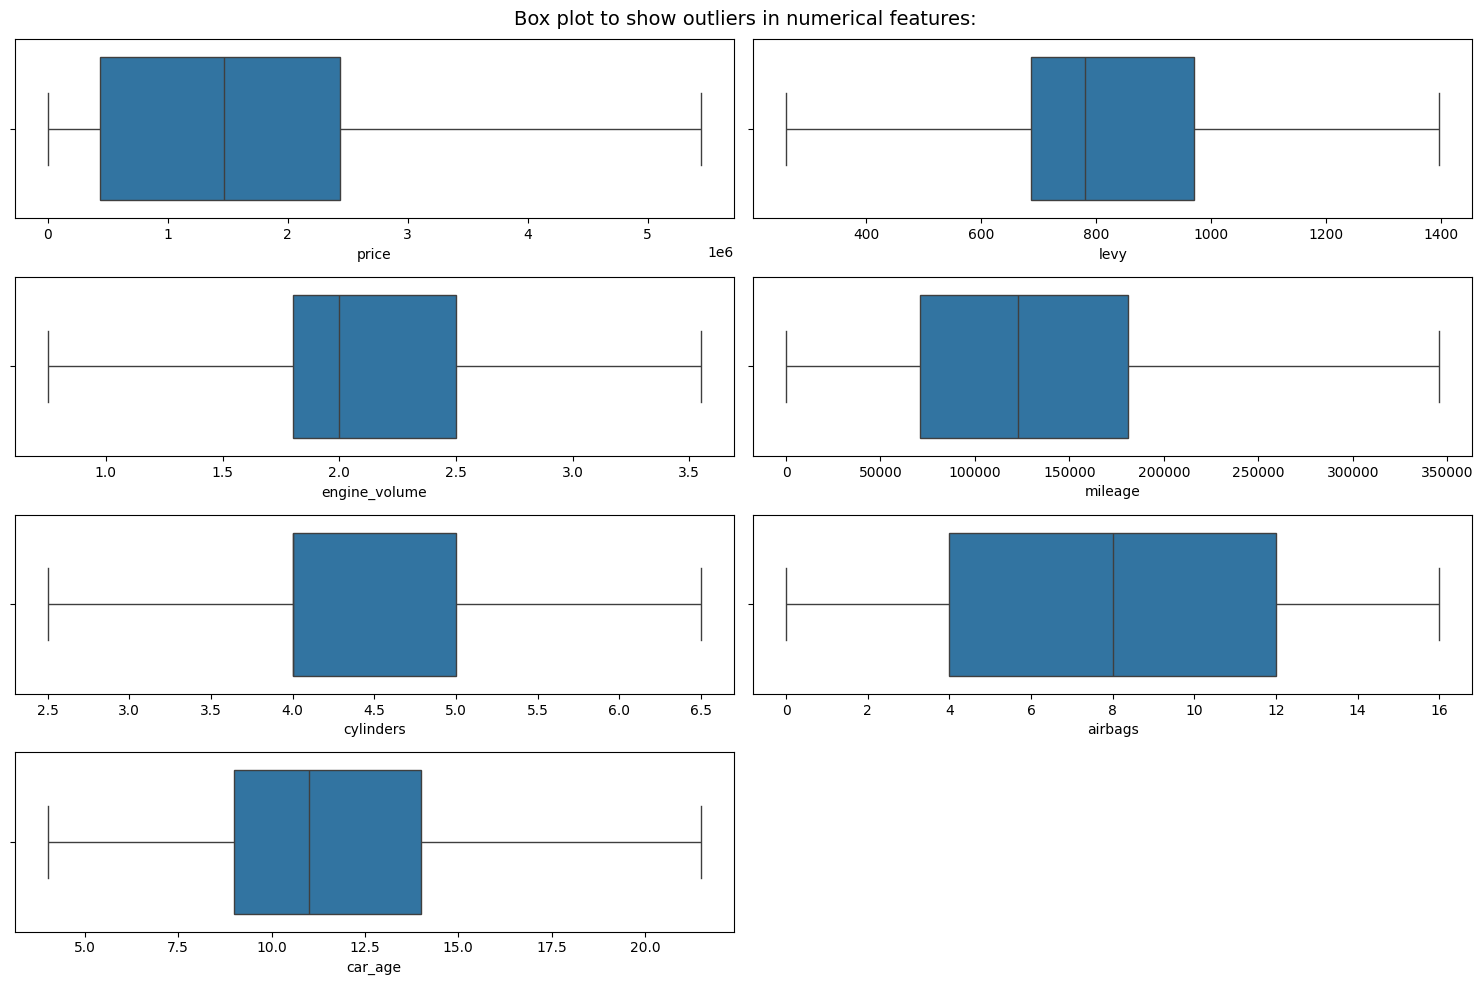

In [73]:
# Plot box plot to show outliers in numerical features:
plt.figure(figsize=(15,10))
for i,col in enumerate(numeric_cols):
  plt.subplot(4,2,i+1)
  sns.boxplot(data=df[numeric_cols],x=col)
plt.suptitle('Box plot to show outliers in numerical features:',fontsize=14)
plt.tight_layout()
plt.show()

In [74]:
numeric_cols = ['levy', 'engine_volume', 'mileage', 'cylinders', 'airbags', 'car_age']

In [75]:
# create processor:
cat_encoder=OneHotEncoder(drop='first',handle_unknown='ignore')
num_scaler=MinMaxScaler()
data_transformer=ColumnTransformer([('cat',cat_encoder,object_cols),('num',num_scaler,numeric_cols)],remainder='passthrough')
data_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['brand', 'category', 'leather_interior',
                                  'fuel_type', 'type', 'drive_wheels', 'doors',
                                  'wheel', 'color']),
                                ('num', MinMaxScaler(),
                                 ['levy', 'engine_volume', 'mileage',
                                  'cylinders', 'airbags', 'car_age'])])

In [76]:
# transform price:
df['price']=MinMaxScaler().fit_transform(df[['price']])

In [77]:
df.price

0        0.305336
1        0.066248
2        0.725531
3        0.033106
4        0.010068
           ...   
10165    0.106574
10166    0.288067
10167    0.479627
10168    0.097921
10169    0.008616
Name: price, Length: 10170, dtype: float64

In [78]:
# transorm data and Encoding:
df_without_price=df.drop('price',axis=1)
transformed_data=data_transformer.fit_transform(df_without_price)
cat_feature_names=data_transformer.named_transformers_['cat'].get_feature_names_out(object_cols)
all_feature_names=list(cat_feature_names)+numeric_cols
df_temp=pd.DataFrame(transformed_data,columns=all_feature_names,index=df.index)
df_temp['price']=df.price
df=df_temp

In [79]:
# save transformer to use again :
# joblib.dump(data_transformer,'data_transformer_preprocessing.pkl')

In [80]:
df.corr().price.sort_values(ascending=False)

price                   1.000000
category_jeep           0.255298
brand_hyundai           0.249196
category_minivan        0.111958
color_grey              0.056930
levy                    0.046294
leather_interior_yes    0.039365
fuel_type_petrol        0.030110
color_white             0.023874
engine_volume           0.017480
category_microbus       0.014426
doors_4                -0.002262
drive_wheels_front     -0.002930
drive_wheels_rear      -0.010945
brand_mercedes-benz    -0.016087
cylinders              -0.019774
color_blue             -0.028550
color_silver           -0.035704
color_red              -0.037834
type_manual            -0.042259
color_green            -0.050706
brand_chevrolet        -0.062166
brand_ford             -0.068101
wheel_right            -0.083101
category_hatchback     -0.122690
airbags                -0.157335
brand_toyota           -0.172995
category_sedan         -0.202939
mileage                -0.261430
car_age                -0.284278
fuel_type_

In [81]:
# separate features and target:
X=df.drop('price',axis=1)
y=df.price

In [82]:
X.head()

,brand_chevrolet,brand_ford,brand_hyundai,brand_mercedes-benz,brand_toyota,category_hatchback,category_jeep,category_microbus,category_minivan,category_sedan,...,color_grey,color_red,color_silver,color_white,levy,engine_volume,mileage,cylinders,airbags,car_age
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.666373,0.803571,0.555132,0.875,0.50,0.514286
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.529049,0.625000,0.488533,0.375,0.00,0.514286
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.554577,0.446429,0.465302,0.375,0.25,0.228571
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.440141,0.375000,0.748587,0.375,0.75,0.571429
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.431338,0.589286,0.624865,0.375,0.75,0.400000


In [83]:
y.head()

0    0.305336
1    0.066248
2    0.725531
3    0.033106
4    0.010068
Name: price, dtype: float64

In [84]:
# split training ,testing:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [85]:
# print size of train and test
print(f'x_train shape : {x_train.shape}')
print(f'x_test shape : {x_test.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'y_test shape : {y_test.shape}')

x_train shape : (8136, 30)
x_test shape : (2034, 30)
y_train shape : (8136,)
y_test shape : (2034,)


# Models:

In [86]:
# create Evaluation Function for print Result:
def evaluate_model(model,x_train,y_train,x_test,y_test):
  model.fit(x_train,y_train)

  y_pred_train=model.predict(x_train)
  mse_train=mean_squared_error(y_train,y_pred_train)
  rmse_train=np.sqrt(mse_train)
  mae_train=mean_absolute_error(y_train,y_pred_train)
  r2_train=r2_score(y_train,y_pred_train)

  y_pred_test=model.predict(x_test)
  mse_test=mean_squared_error(y_test,y_pred_test)
  rmse_test=np.sqrt(mse_train)
  mae_test=mean_absolute_error(y_test,y_pred_test)
  r2_test=r2_score(y_test,y_pred_test)

  print('Model summary:','-'*50,sep='\n')
  print('Training:\n',f'MSE={mse_train}\n RMSE={rmse_train}\n MAE={mae_train}\n R2={r2_train}')
  print('-'*50)
  print('Testing:\n',f'MSE={mse_test}\n RMSE={rmse_test}\n MAE={mae_test}\n R2={r2_test}')
  return mse_train,rmse_train,mae_train,r2_train,mse_test,rmse_test,mae_test,r2_test

In [87]:
details=dict()


In [88]:
# 1- LinearRegression:
lr=LinearRegression()
mse_train,rmse_train,mae_train,r2_train,mse_test,rmse_test,mae_test,r2_test=evaluate_model(lr,x_train,y_train,x_test,y_test)
details['LinearRegression']=[mse_train,rmse_train,mae_train,r2_train,mse_test,rmse_test,mae_test,r2_test]


Model summary:
--------------------------------------------------
Training:
 MSE=0.052334975222296576
 RMSE=0.2287683877250014
 MAE=0.17395377128405343
 R2=0.3065833437248976
--------------------------------------------------
Testing:
 MSE=0.05121342415188265
 RMSE=0.2287683877250014
 MAE=0.17220484543379286
 R2=0.28275309497961865


In [89]:
# 2- apply PCA:
pca=PCA(n_components=15)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)
mse_train,rmse_train,mae_train,r2_train,mse_test,rmse_test,mae_test,r2_test=evaluate_model(lr,x_train_pca,y_train,x_test_pca,y_test)
details['LinearRegression_pca']=[mse_train,rmse_train,mae_train,r2_train,mse_test,rmse_test,mae_test,r2_test]

Model summary:
--------------------------------------------------
Training:
 MSE=0.05676488682677779
 RMSE=0.23825382856688324
 MAE=0.1837698661212734
 R2=0.24788885730685584
--------------------------------------------------
Testing:
 MSE=0.05443740394886253
 RMSE=0.23825382856688324
 MAE=0.18096168127141904
 R2=0.23760107537682373


In [90]:
# 3- apply ploynomial feature :
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train_pca)
x_test_poly=poly.transform(x_test_pca)
mse_train,rmse_train,mae_train,r2_train,mse_test,rmse_test,mae_test,r2_test=evaluate_model(lr,x_train_poly,y_train,x_test_poly,y_test)
details['LinearRegression_poly']=[mse_train,rmse_train,mae_train,r2_train,mse_test,rmse_test,mae_test,r2_test]

Model summary:
--------------------------------------------------
Training:
 MSE=0.04675047976630473
 RMSE=0.21621859255462916
 MAE=0.16307206794978601
 R2=0.3805755859993831
--------------------------------------------------
Testing:
 MSE=0.04730565022800921
 RMSE=0.21621859255462916
 MAE=0.1639189580602558
 R2=0.3374816900469052


In [91]:
# 4- Random Forrest:
rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=10,
    min_samples_split=9,
    min_samples_leaf=8,
    random_state=42
)
mse_train,rmse_train,mae_train,r2_train,mse_test,rmse_test,mae_test,r2_test=evaluate_model(rf_model,x_train,y_train,x_test,y_test)
details['RandomForrest']=[mse_train,rmse_train,mae_train,r2_train,mse_test,rmse_test,mae_test,r2_test]

Model summary:
--------------------------------------------------
Training:
 MSE=0.019617413353884502
 RMSE=0.14006217674263277
 MAE=0.09337283335204477
 R2=0.7400774316824029
--------------------------------------------------
Testing:
 MSE=0.023500755668514974
 RMSE=0.14006217674263277
 MAE=0.10120018300209509
 R2=0.6708705862179123


In [92]:
# 5- Random Forrest with pca:
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=4,
    max_features='sqrt',
    max_samples=0.8,
    random_state=42
)
mse_train,rmse_train,mae_train,r2_train,mse_test,rmse_test,mae_test,r2_test=evaluate_model(rf_model,x_train_pca,y_train,x_test_pca,y_test)
details['RandomForrest_pca']=[mse_train,rmse_train,mae_train,r2_train,mse_test,rmse_test,mae_test,r2_test]

Model summary:
--------------------------------------------------
Training:
 MSE=0.026482555208452625
 RMSE=0.1627346158887304
 MAE=0.11626024447443369
 R2=0.6491171572305907
--------------------------------------------------
Testing:
 MSE=0.03396994935481421
 RMSE=0.1627346158887304
 MAE=0.1292428122030451
 R2=0.5242489358614011


In [93]:
# 6- gradientboost:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
mse_train,rmse_train,mae_train,r2_train,mse_test,rmse_test,mae_test,r2_test=evaluate_model(gb_model,x_train,y_train,x_test,y_test)
details['GradientBoost']=[mse_train,rmse_train,mae_train,r2_train,mse_test,rmse_test,mae_test,r2_test]

Model summary:
--------------------------------------------------
Training:
 MSE=0.02774535371527058
 RMSE=0.1665693660769308
 MAE=0.11974504300085592
 R2=0.6323856021963612
--------------------------------------------------
Testing:
 MSE=0.029665931864050758
 RMSE=0.1665693660769308
 MAE=0.12213990571478252
 R2=0.5845269445188284


In [94]:
# 7- XGB:
xgb_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.06,max_depth=8,min_child_weight=4,reg_alpha=2,reg_lambda=12)
mse_train,rmse_train,mae_train,r2_train,mse_test,rmse_test,mae_test,r2_test=evaluate_model(xgb_model,x_train,y_train,x_test,y_test)
details['XGBoosting']=[mse_train,rmse_train,mae_train,r2_train,mse_test,rmse_test,mae_test,r2_test]

Model summary:
--------------------------------------------------
Training:
 MSE=0.013500756168482977
 RMSE=0.1161927543717033
 MAE=0.07688524177108132
 R2=0.8211205955525793
--------------------------------------------------
Testing:
 MSE=0.020158579489106036
 RMSE=0.1161927543717033
 MAE=0.0914821555735514
 R2=0.7176779528490651


In [95]:
Details=pd.DataFrame(details,index=['mse_train','rmse_train','mae_train','r2_train','mse_test','rmse_test','mae_test','r2_test'])
Details

,LinearRegression,LinearRegression_pca,LinearRegression_poly,RandomForrest,RandomForrest_pca,GradientBoost,XGBoosting
mse_train,0.052335,0.056765,0.046750,0.019617,0.026483,0.027745,0.013501
rmse_train,0.228768,0.238254,0.216219,0.140062,0.162735,0.166569,0.116193
mae_train,0.173954,0.183770,0.163072,0.093373,0.116260,0.119745,0.076885
r2_train,0.306583,0.247889,0.380576,0.740077,0.649117,0.632386,0.821121
mse_test,0.051213,0.054437,0.047306,0.023501,0.033970,0.029666,0.020159
rmse_test,0.228768,0.238254,0.216219,0.140062,0.162735,0.166569,0.116193
mae_test,0.172205,0.180962,0.163919,0.101200,0.129243,0.122140,0.091482
r2_test,0.282753,0.237601,0.337482,0.670871,0.524249,0.584527,0.717678


# Best Model : "XGBoosting"

In [96]:
xgb_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.06,max_depth=8,min_child_weight=4,reg_alpha=2,reg_lambda=12)

In [97]:
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.06, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [98]:
y_pred=xgb_model.predict(x_test)

In [99]:
y_pred

array([0.03359972, 0.14389454, 0.32561794, ..., 0.02034791, 0.35982165,
       0.31357557], dtype=float32)

In [100]:
mse_train,rmse_train,mae_train,r2_train,mse_test,rmse_test,mae_test,r2_test=evaluate_model(xgb_model,x_train,y_train,x_test,y_test)

Model summary:
--------------------------------------------------
Training:
 MSE=0.013500756168482977
 RMSE=0.1161927543717033
 MAE=0.07688524177108132
 R2=0.8211205955525793
--------------------------------------------------
Testing:
 MSE=0.020158579489106036
 RMSE=0.1161927543717033
 MAE=0.0914821555735514
 R2=0.7176779528490651


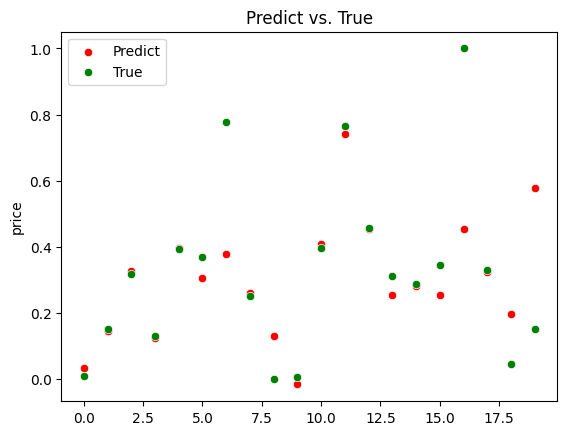

In [101]:
# plot result:
sns.scatterplot(x=np.arange(20),y=y_pred[:20],color='red',label='Predict')
sns.scatterplot(x=np.arange(20),y=y_test[:20],color='green',label='True')
plt.legend()
plt.title('Predict vs. True')
plt.show()

In [102]:
# Save model:
# joblib.dump(xgb_model,'xgb_model.pkl')